# Exercises and Homework for week 9

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

Homework is due on **Wednesday, 23/06/2022, 23:55pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_9_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * Curve fitting
 * differential equations

**Your group number here please:**  Group 21

## 1. Lecture Review (0 points)

If you did the lecture review questions [03_Lecture_Review.ipynb](03_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

## 2. Temperature of the cosmic microwave background (10 points)

The file [data/Cobe.txt](data/Cobe.txt) contains data from the [COBE satellite](http://lambda.gsfc.nasa.gov/product/cobe/). It shows the spectrum of the cosmic microwave background. The first row gives the
frequency (actually the inverse of the wavelength in 1/cm), the second row the spectrum in MJy/sr (MJy:
Mega-Jansky, 1 Jy= $10^{-26}$ W/Hz m2 ; sr: Steradian), so it is a measure of the spectral flux per solid
angle. The third row shows the uncertainty on the spectrum in kJy/sr.
Use `scipy.optimize.curve_fit` to perform a fit to the data. The function describing the data is the Planck law
$f(x) = \frac{A_0 x3}{exp(1.439x/T )-1}$, where $x$ is the frequency in 1/cm. $A_0$ and $T$ are the fit parameters, where $A_0$ is the amplitude and $T$ the temperature of the universe. The factor 1.439 K cm comes from $hc/k_B$ in the chosen unit frame. Determine from the fit how hot the universe is. 

- Read in the data and plot the data with their errorbars

  **Hints:**
  - Please read carefully the comments in the data-file. What is given in the different columns in *which* units!
  - You use use the function `plt.errorbar` for this task.
- Fit the Planck function $f(x)$ to the data and determine the temperature of the Universe.
- Include a plot of the best-fit curve in the errorbar-plot.

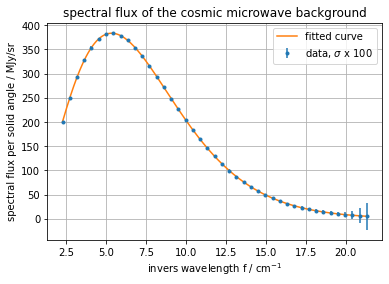

According to this data, the temperature of the universe is 2.72543 +- 0.00003 K


In [31]:
# your solution here
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

#define input file
filename = 'data/Cobe.txt'
#read data from file
data = np.loadtxt(filename)

#extract frequencies from file
freqs = data[:,0]
#and spectrum
spectrum = data[:,1]
#and error of spectrum and convert to same units as the spectrum itself
sigma_spectrum = data[:,2]*1e-3

#define plank spectrum function
f = lambda x, a0, t: a0*np.power(x,3)/(np.exp(1.439*x/t)-1)
#fit planck spectrum to data points
params, errors = so.curve_fit(f, freqs, spectrum, sigma=sigma_spectrum, absolute_sigma=True)

#create array of frequencies for plotting
x = np.linspace(freqs[0], freqs[-1], 300)

#plot data as errorbar plot, enlarge errors by factor 100
plt.errorbar(freqs, spectrum, yerr=sigma_spectrum*100, fmt='.', label='data, $\sigma$ x 100')
#plot best fitted spectrum
plt.plot(x, f(x,*params), '-', label='fitted curve')
plt.xlabel('invers wavelength f / cm$^{-1}$')
plt.ylabel('spectral flux per solid angle / MJy/sr')
plt.title('spectral flux of the cosmic microwave background')
plt.grid()
plt.legend()
plt.show()

#print out results from curve_fit for temperature of the universe
print(f'According to this data, the temperature of the universe is {params[1]:.5f} +- {np.sqrt(np.diag(errors))[1]:.5f} K')

## 3. Felix Baumgartners drop (20 points)

**This homework is based on a project from Ludovic van Waerbeke**

<img src="figs/baumgartner.jpg" style="height: 200px;">

**Important: This task needs to be solved with a `Python` script which can be executed on the `Linux` command line! Notebook solutions will *not* be graded and counted with 0 points!**

In October 2012, Felix Baumgartner broke the world record of skydiving at that time, by jumping from an altitude of 39 km and reaching a maximum speed of 1357 km/h. In this problem you will calculate Baumgartner's trajectory by solving numerically the free fall equation, taking into account the varying air density and the varying drag coefficient. We will have to make some simplifying assumptions which will prevent us from reproducing the exact characteristics of his jump, but we will get a good idea of what happened.

For this exercise we will look at a one-dimensional free fall case with a drag term that is proportional to velocity square. This is realistic for high speed situations. The equation of motion is:
$$
m\ddot{z}=mg-\frac 12 \rho(z)C_D(z)A(t)\dot{z}^2,
$$
where $z$ is Baumgartners space-coordinate with $z=0$ at the surface of the Earth. His jump starts at $z_0=39$ km.
$m$ is the mass of the jumper, $\rho(z)$ the air density, $C_D(z)$ 
the drag coefficient and $A(t)$ the jumper’s cross-section.

Baumgartners jump has two phases:
1. Phase 1 is the free-fall with the parachute closed. Phase 1 starts at $z_0=39$ km and ens at about $z_P\approx 2$ km. Additional parameters of tis phase are: $g=9.8$ ms$^{-2}$ (we assume this as constant!), $m=118$ kg, $C_D(z)=0.3$ and $A(t)=0.9$ m$²$. The air density depends on the space-coordinate $z$ via $\rho(z) = 1.22\exp(-\frac z{10\text{ km}})$ kg m$^{-3}$.

2. Phase 2 starts when the parachute is opened at $z_P\approx 2$ km. The parameters of that phase of the jump are: $g=9.8$ ms$^{-2}$, $m=118$ kg, $C_D(z)=1.5$ and $\rho(z)=1.22$ kg m$^{-3}$ (const). The crosssection $A(t)$ is now determined by the parachute and we must take into account that it takes some seconds to open it completely. We model this by:

$$
A(t)=1+50\left(\frac{1-\exp(-(t-t_F)/5\text{s})}{1+\exp(-(t-t_F)/5\text{s})}\right)\text{m}^2.
$$

**Your tasks:**
1. Implement Felixs drop in a script with name `skydive_group_X.py` and create plots of the jump for $z(t)$ and $\dot{z}(t)$. The initial conditions are $z(0)=z_0=39$ km and $\dot{z}(0)=0$ m/s. The jump ends at $z(t_e)=0$ m.
2. Answer within a textfile `skydive_group_X.txt` the following questions:
  1. What is the maximal (absolute) velocity that Felix reaches with our model?
  2. What is his speed when he reaches the surface of the Earth?
  3. How long did the complete jump last?
  4. Why does Felixs speed at the start of the jump raise quickly but slows down already before he opens his parachute?

**Hints**: (1) You need to solve *two* differential equations. One for phase 1 ($0\leq t\leq t_F$) of the jump and the other one for phase 2 ($t_F<t\leq t_e$). The solution of the equation for phase 1 at $z(t_P)$ determines the initial conditions for the ODE of phase2!; (2) For the final plots you need to *combine* the two solutions; (3) Test your pogram by checking your solution for plausibility. The jump should not last for hours and nobody survives a crash on the Earth with $v=100$ m/s etc.